# Illustrating Lyapunov Instability for Double Pendulum using RK4

In [ ]:
import sys
sys.path.append('..')

import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from Code.time_integrator import *
from Code.dynamical_system import *

##Define parameters for the double pendulum chaotic system

In [ ]:
np.random.seed(2512517)
mass = [1,1]
L1 = 1
L2 = 1
g = 9.81
dt = 0.001
T_final = 50.0
DoublePendulum = DoublePendulum(mass, L1, L2, g)
#forward_euler_integrator = ForwardEulerIntegrator(DoublePendulum,dt)
#verlet_integrator = VerletIntegrator(DoublePendulum,dt)
#symplectic_euler_integrator = SymplecticEulerIntegrator(DoublePendulum,dt)
rk4_integrator = RK4Integrator(DoublePendulum,dt)


##Integrate forwards using the RK4 integrator

In [ ]:
n_step = int(T_final/dt)

x1 = np.zeros((1,2))
v1 = np.zeros((1,2))
x1[0] = [(math.pi)/2,(math.pi)/2]
v1[0] = [0,0]

energies1 = np.zeros((1,n_step))
x_phase1 = np.zeros((1,n_step,2))
v_phase1 = np.zeros((1,n_step,2))

integrator = rk4_integrator
j = 0

integrator.set_state(x1,v1)
for k in range(n_step):
    energies1[j,k] = DoublePendulum.energy(integrator.x,integrator.v)
    x_phase1[j,k,0] = integrator.x[0]
    x_phase1[j,k,1] = integrator.x[1]
    v_phase1[j,k,0] = integrator.v[0]
    v_phase1[j,k,1] = integrator.v[1]
    integrator.integrate(1)


x2 = np.zeros((1,2))
v2 = np.zeros((1,2))
x2[0] = [(math.pi)/2,(math.pi)/2]
v2[0] = [0,0.001]

energies2 = np.zeros((1,n_step))
x_phase2 = np.zeros((1,n_step,2))
v_phase2 = np.zeros((1,n_step,2))

integrator.set_state(x2,v2)
for k in range(n_step):
    energies2[j,k] = DoublePendulum.energy(integrator.x,integrator.v)
    x_phase2[j,k,0] = integrator.x[0]
    x_phase2[j,k,1] = integrator.x[1]
    v_phase2[j,k,0] = integrator.v[0]
    v_phase2[j,k,1] = integrator.v[1]
    integrator.integrate(1)   


x3 = np.zeros((1,2))
v3 = np.zeros((1,2))
x3[0] = [(math.pi)/2,(math.pi)/2]
v3[0] = [0,0.0001]

energies3 = np.zeros((1,n_step))
x_phase3 = np.zeros((1,n_step,2))
v_phase3 = np.zeros((1,n_step,2))

integrator.set_state(x3,v3)
for k in range(n_step):
    energies3[j,k] = DoublePendulum.energy(integrator.x,integrator.v)
    x_phase3[j,k,0] = integrator.x[0]
    x_phase3[j,k,1] = integrator.x[1]
    v_phase3[j,k,0] = integrator.v[0]
    v_phase3[j,k,1] = integrator.v[1]
    integrator.integrate(1)   

##Compute Cartesian Coordinates of both masses

In [ ]:
#First run

cartesian_11 = np.zeros((1,n_step,2))
cartesian_11[:,:,0] = L1 * np.sin(x_phase1[:,:,0]) #x-coordinates of mass 1
cartesian_11[:,:,1] = -L1 * np.cos(x_phase1[:,:,0]) #y-coordinates of mass 1

cartesian_21 = np.zeros((1,n_step,2))
cartesian_21[:,:,0] = L1 * np.sin(x_phase1[:,:,0]) + L2 * np.sin(x_phase1[:,:,1]) #x-coordinates of mass 2
cartesian_21[:,:,1] = -L1 * np.cos(x_phase1[:,:,0]) - L2 * np.cos(x_phase1[:,:,1])#y-coordinates of mass 2

#Second run

cartesian_12 = np.zeros((1,n_step,2))
cartesian_12[:,:,0] = L1 * np.sin(x_phase2[:,:,0]) #x-coordinates of mass 1
cartesian_12[:,:,1] = -L1 * np.cos(x_phase2[:,:,0]) #y-coordinates of mass 1

cartesian_22 = np.zeros((1,n_step,2))
cartesian_22[:,:,0] = L1 * np.sin(x_phase2[:,:,0]) + L2 * np.sin(x_phase2[:,:,1]) #x-coordinates of mass 2
cartesian_22[:,:,1] = -L1 * np.cos(x_phase2[:,:,0]) - L2 * np.cos(x_phase2[:,:,1])#y-coordinates of mass 2

#Third run

cartesian_13 = np.zeros((1,n_step,2))
cartesian_13[:,:,0] = L1 * np.sin(x_phase3[:,:,0]) #x-coordinates of mass 1
cartesian_13[:,:,1] = -L1 * np.cos(x_phase3[:,:,0]) #y-coordinates of mass 1

cartesian_23 = np.zeros((1,n_step,2))
cartesian_23[:,:,0] = L1 * np.sin(x_phase3[:,:,0]) + L2 * np.sin(x_phase3[:,:,1]) #x-coordinates of mass 2
cartesian_23[:,:,1] = -L1 * np.cos(x_phase3[:,:,0]) - L2 * np.cos(x_phase3[:,:,1])#y-coordinates of mass 2

## Plot energy drift

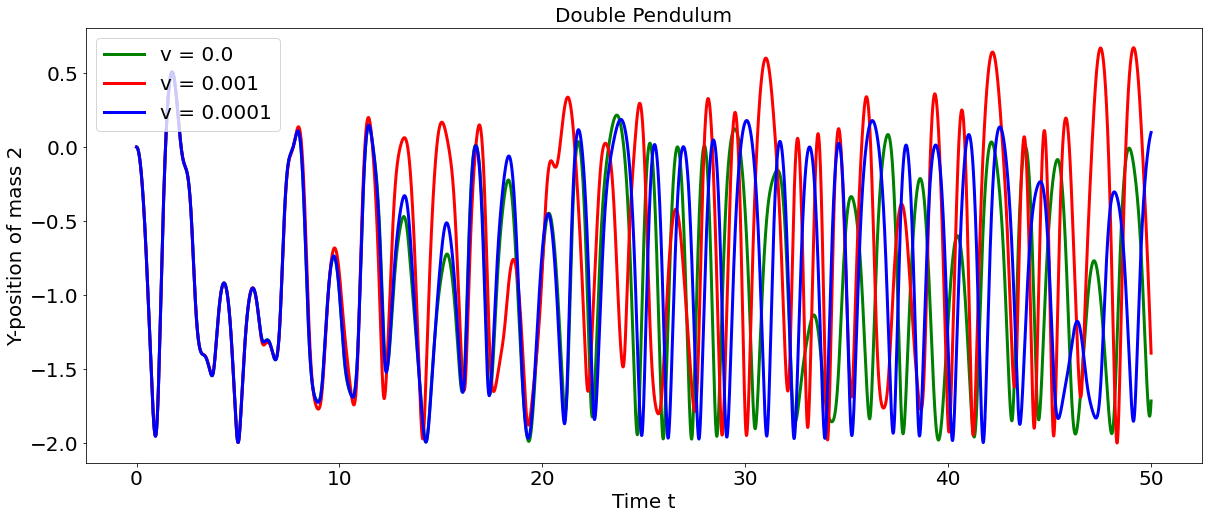

In [ ]:
plt.clf()

X = dt*np.arange(n_step)
plt.plot(X,cartesian_21[0,:,1],linewidth=3,color='green',label='v = 0.0')
plt.plot(X,cartesian_22[0,:,1],linewidth=3,color='red',label='v = 0.001')
plt.plot(X,cartesian_23[0,:,1],linewidth=3,color='blue',label='v = 0.0001')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.ylabel('Y-position of mass 2')
plt.xlabel('Time t')
plt.title('Double Pendulum')
plt.legend(loc="upper left")

plt.rcParams['figure.figsize'] = [20, 8]
